In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the new dataset as per the user's instructions for step-by-step plotting
new_clean_data_path = 'clean_data_Feb_24.csv'
# Reload the dataset using the first column as the index
new_clean_data = pd.read_csv(new_clean_data_path, index_col=0)

pd.set_option('display.max_rows', 10)

new_clean_data.fillna('None', inplace=True)
new_clean_data = new_clean_data.reset_index(drop = True)

# Display the first few rows of the dataframe to confirm the index is set correctly
new_clean_data



,model,prior,duplicates_level,distortion_level,num_iter,precision,recall,f1score
0,Both,Pitman,Low,Low,10000,0.980198,0.951923,0.965854
1,Both,Pitman,Medium,High,10000,0.981529,0.712766,0.825831
2,Both,Pitman,Medium,Low,10000,0.994200,0.956299,0.974881
3,Both,Pitman,High,Low,10000,1.000000,0.947767,0.973183
4,Both,Pitman,Very High,Low,10000,1.000000,0.952495,0.975670
...,...,...,...,...,...,...,...,...
187,No Empirical,Bounded NBD,Medium,High,50000,0.974423,0.722479,0.829748
188,No Empirical,Bounded NBD,Low,High,50000,0.950000,0.727273,0.823848
189,No Empirical,Bounded NBD,High,Low,50000,1.000000,0.951098,0.974936
190,No Empirical,Bounded NBD,Medium,Low,50000,0.996141,0.960019,0.977746


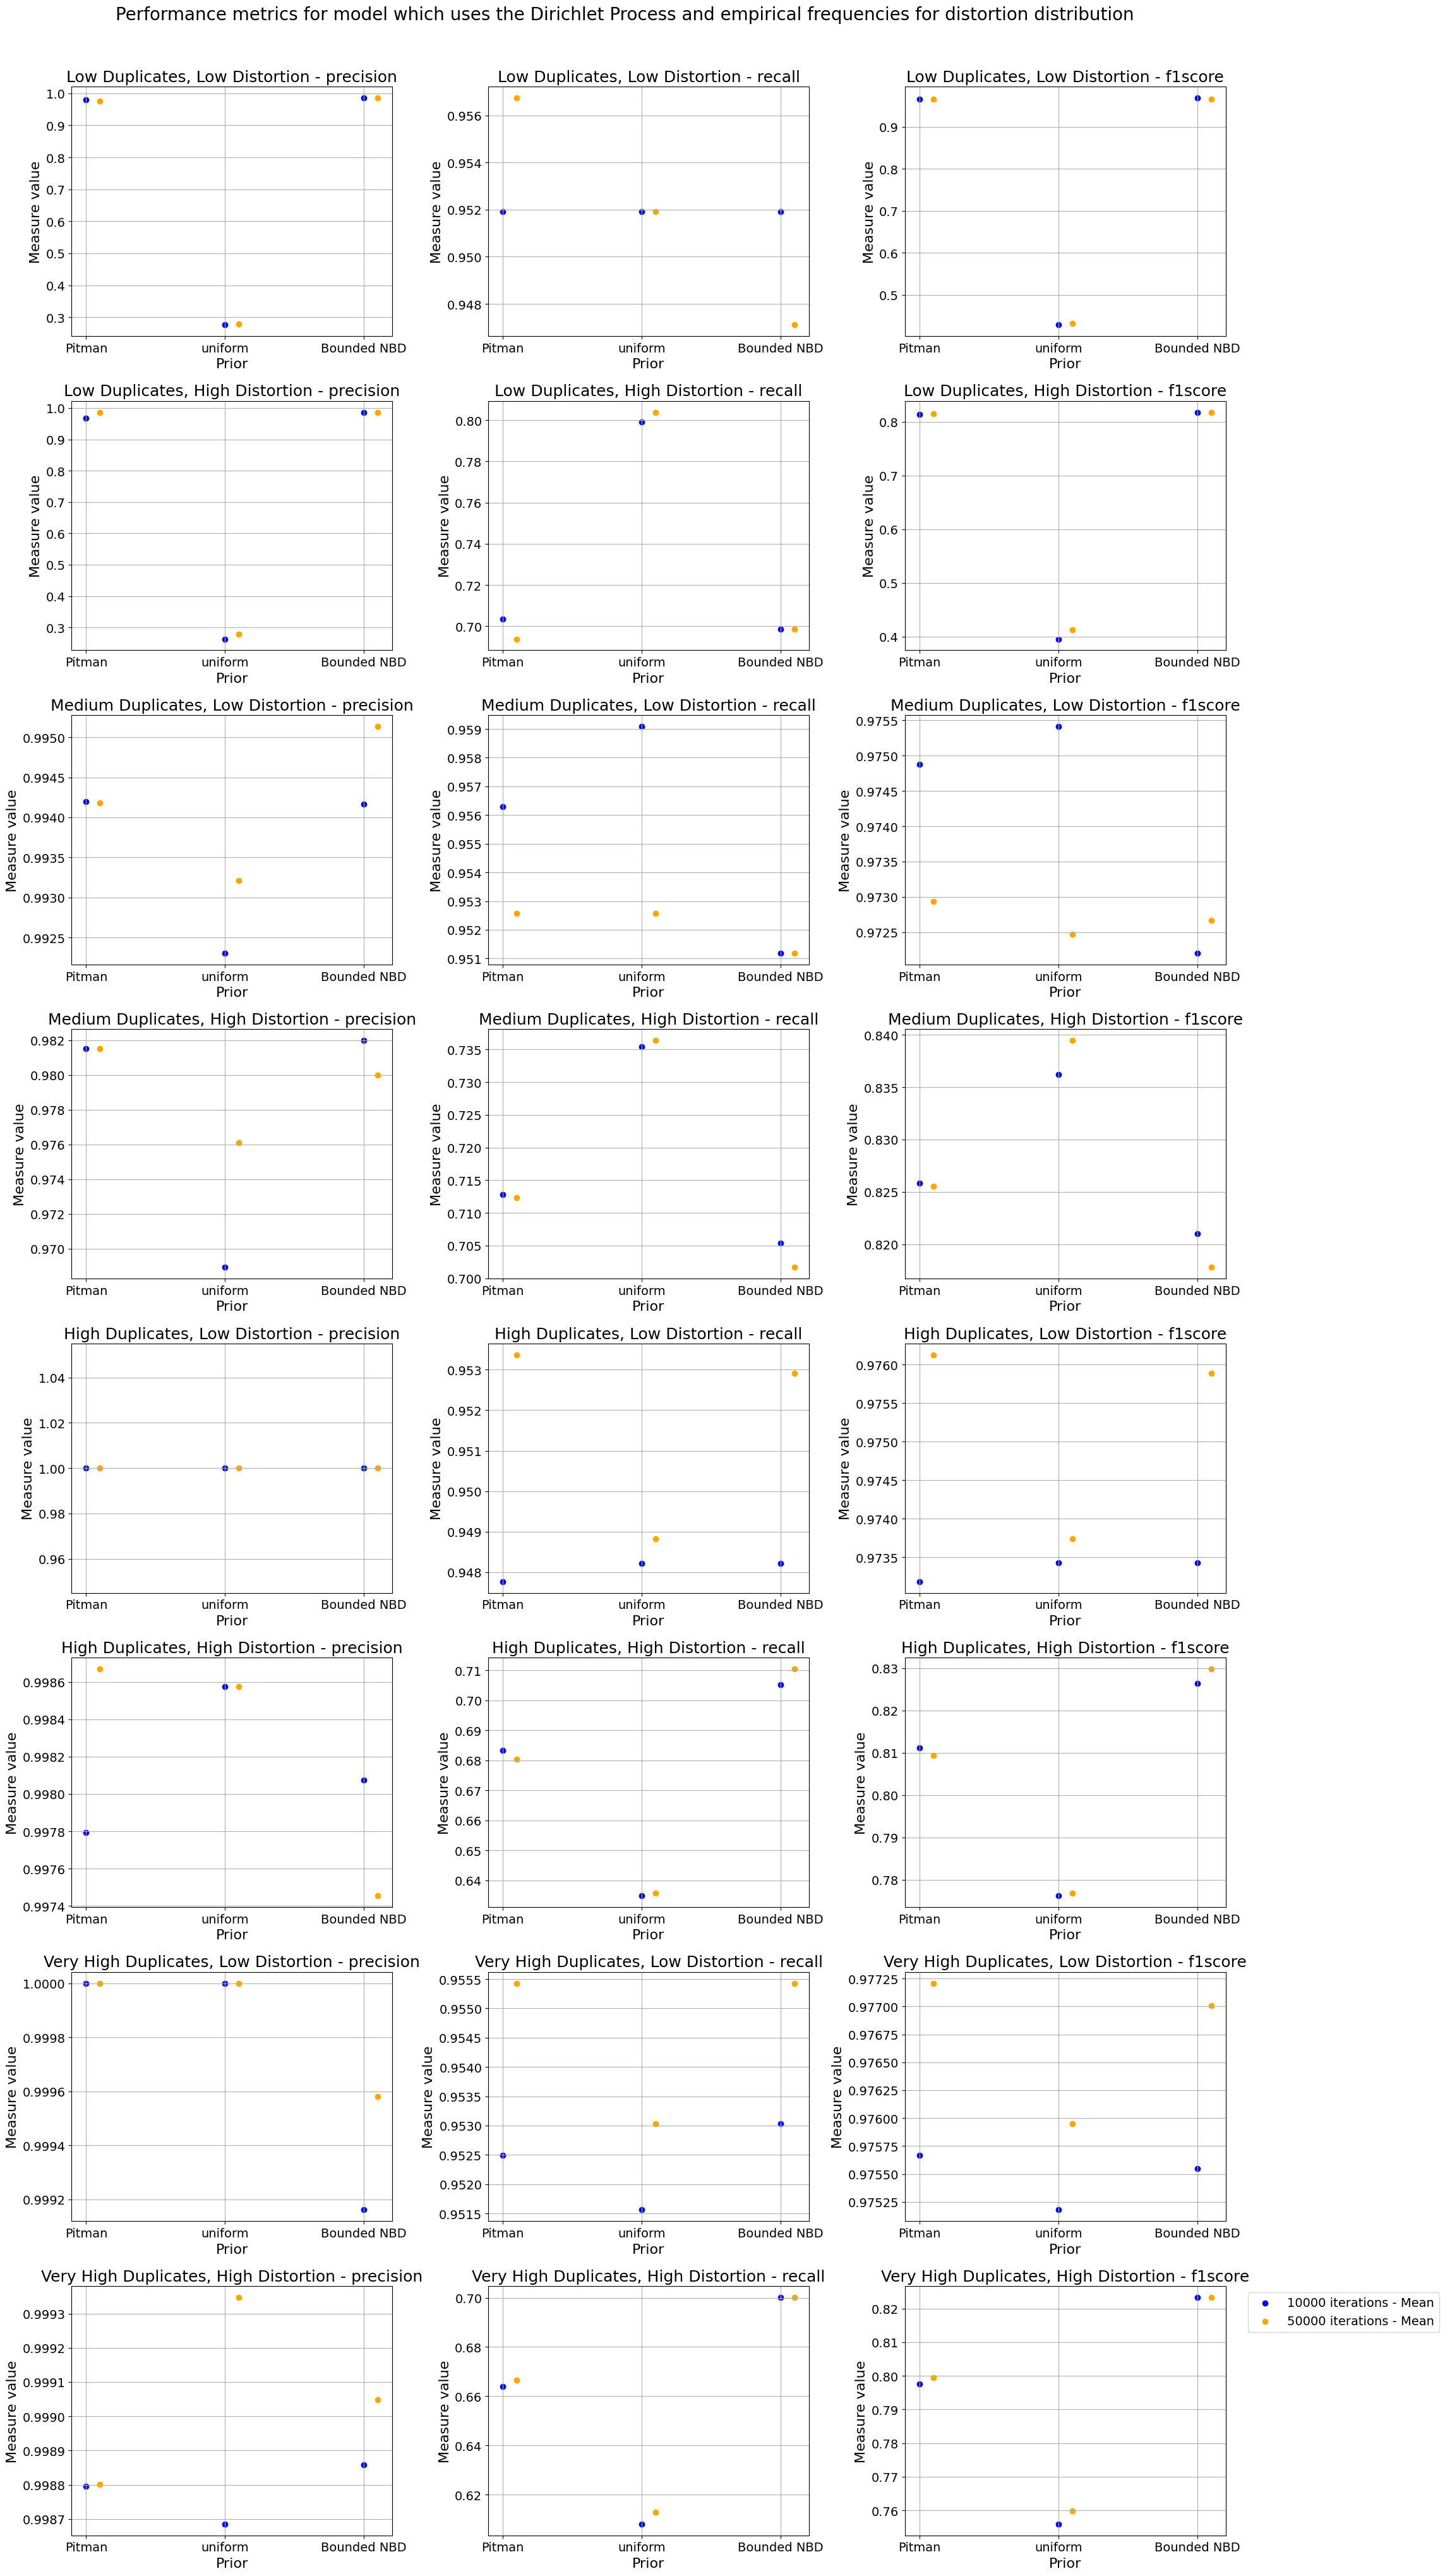

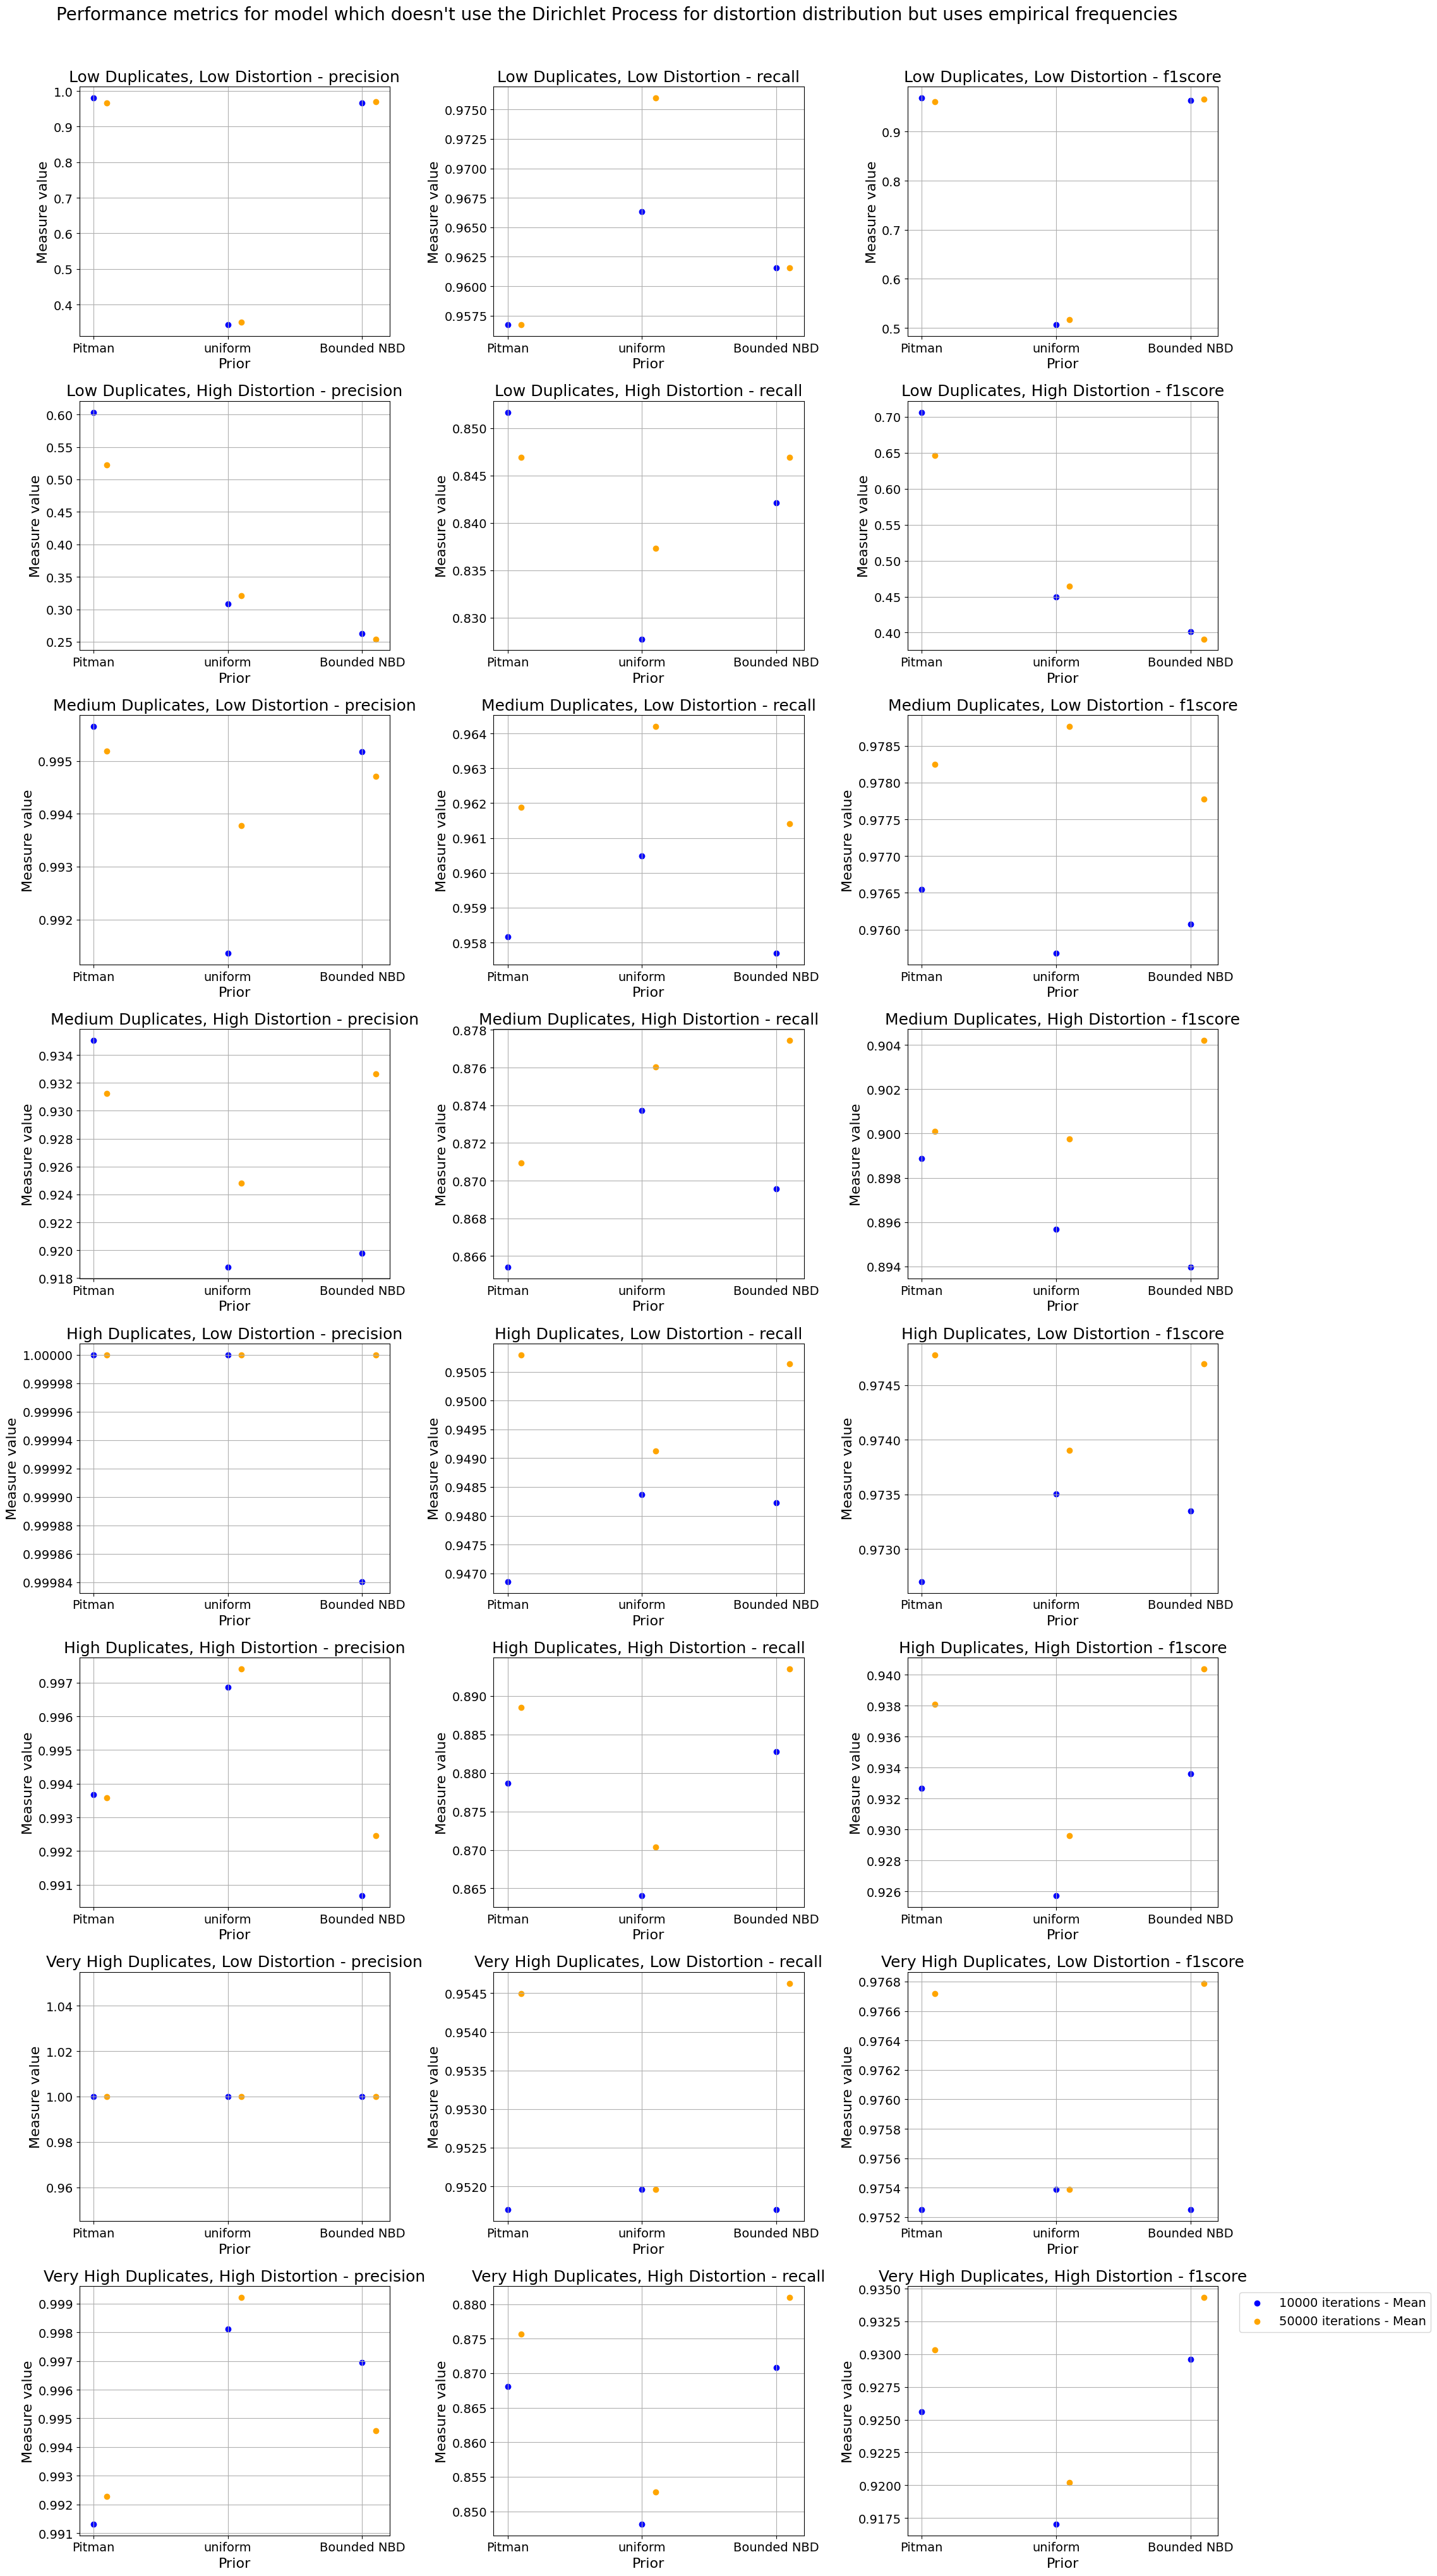

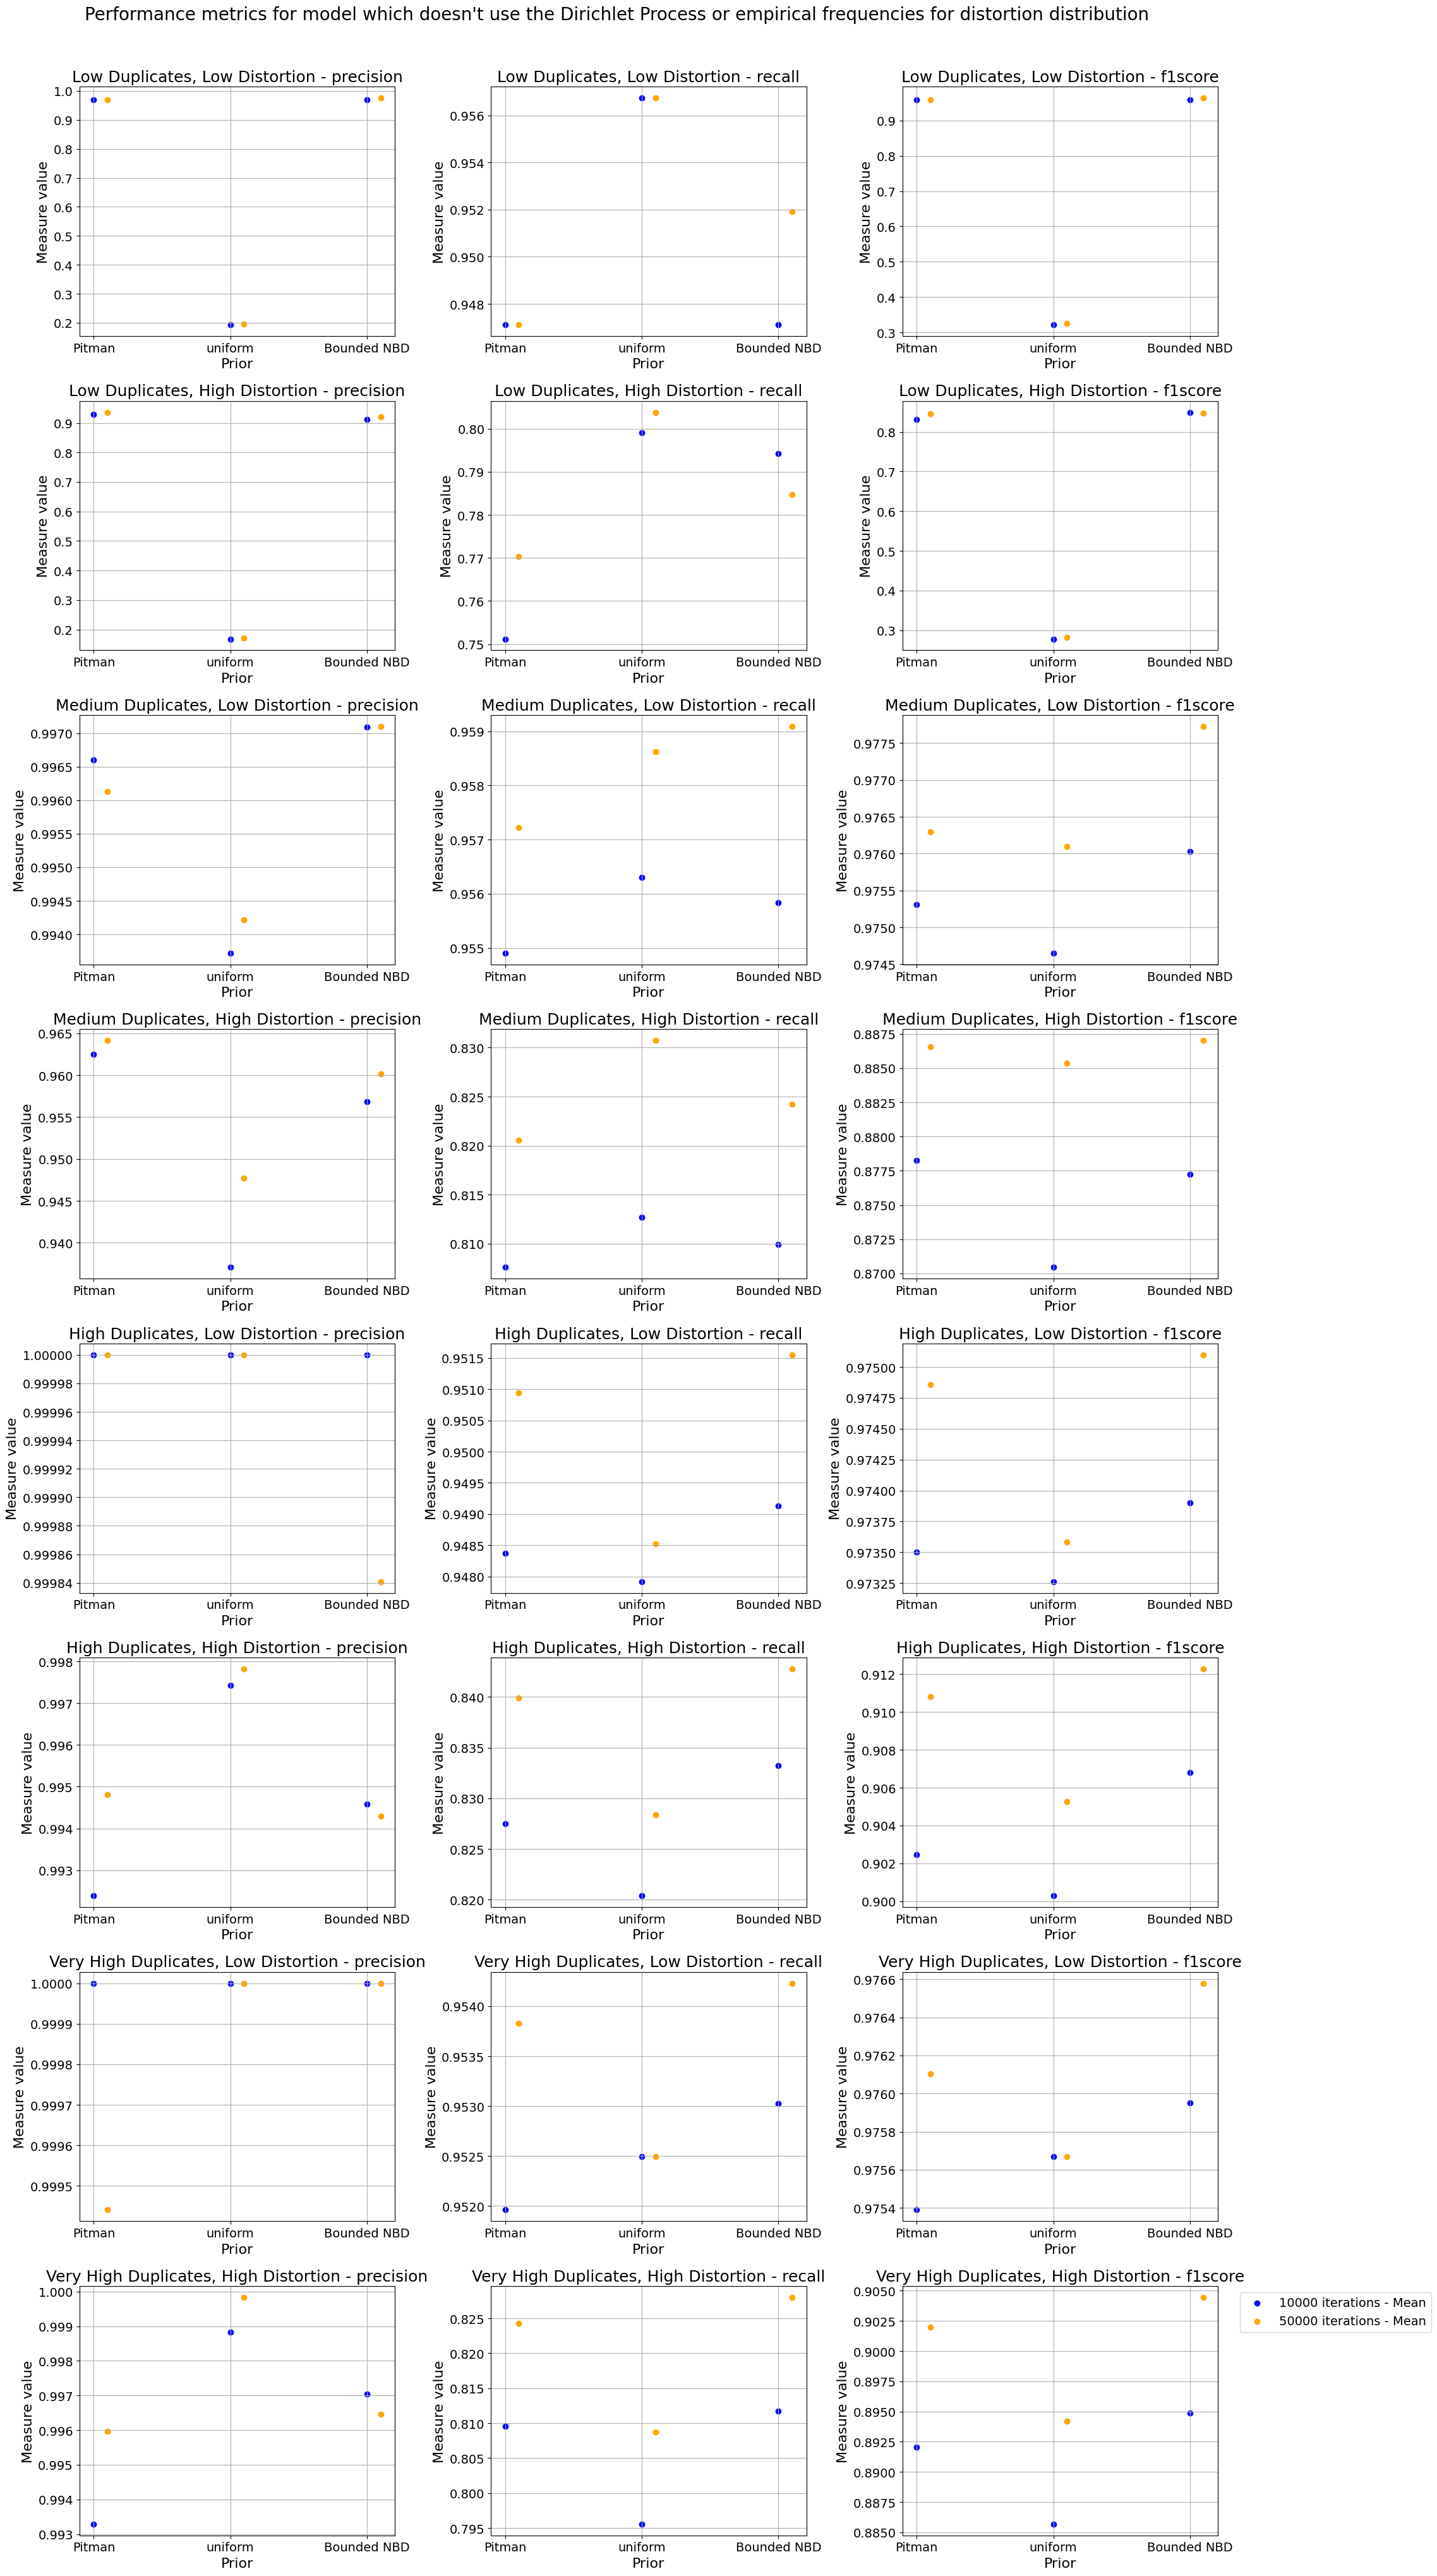

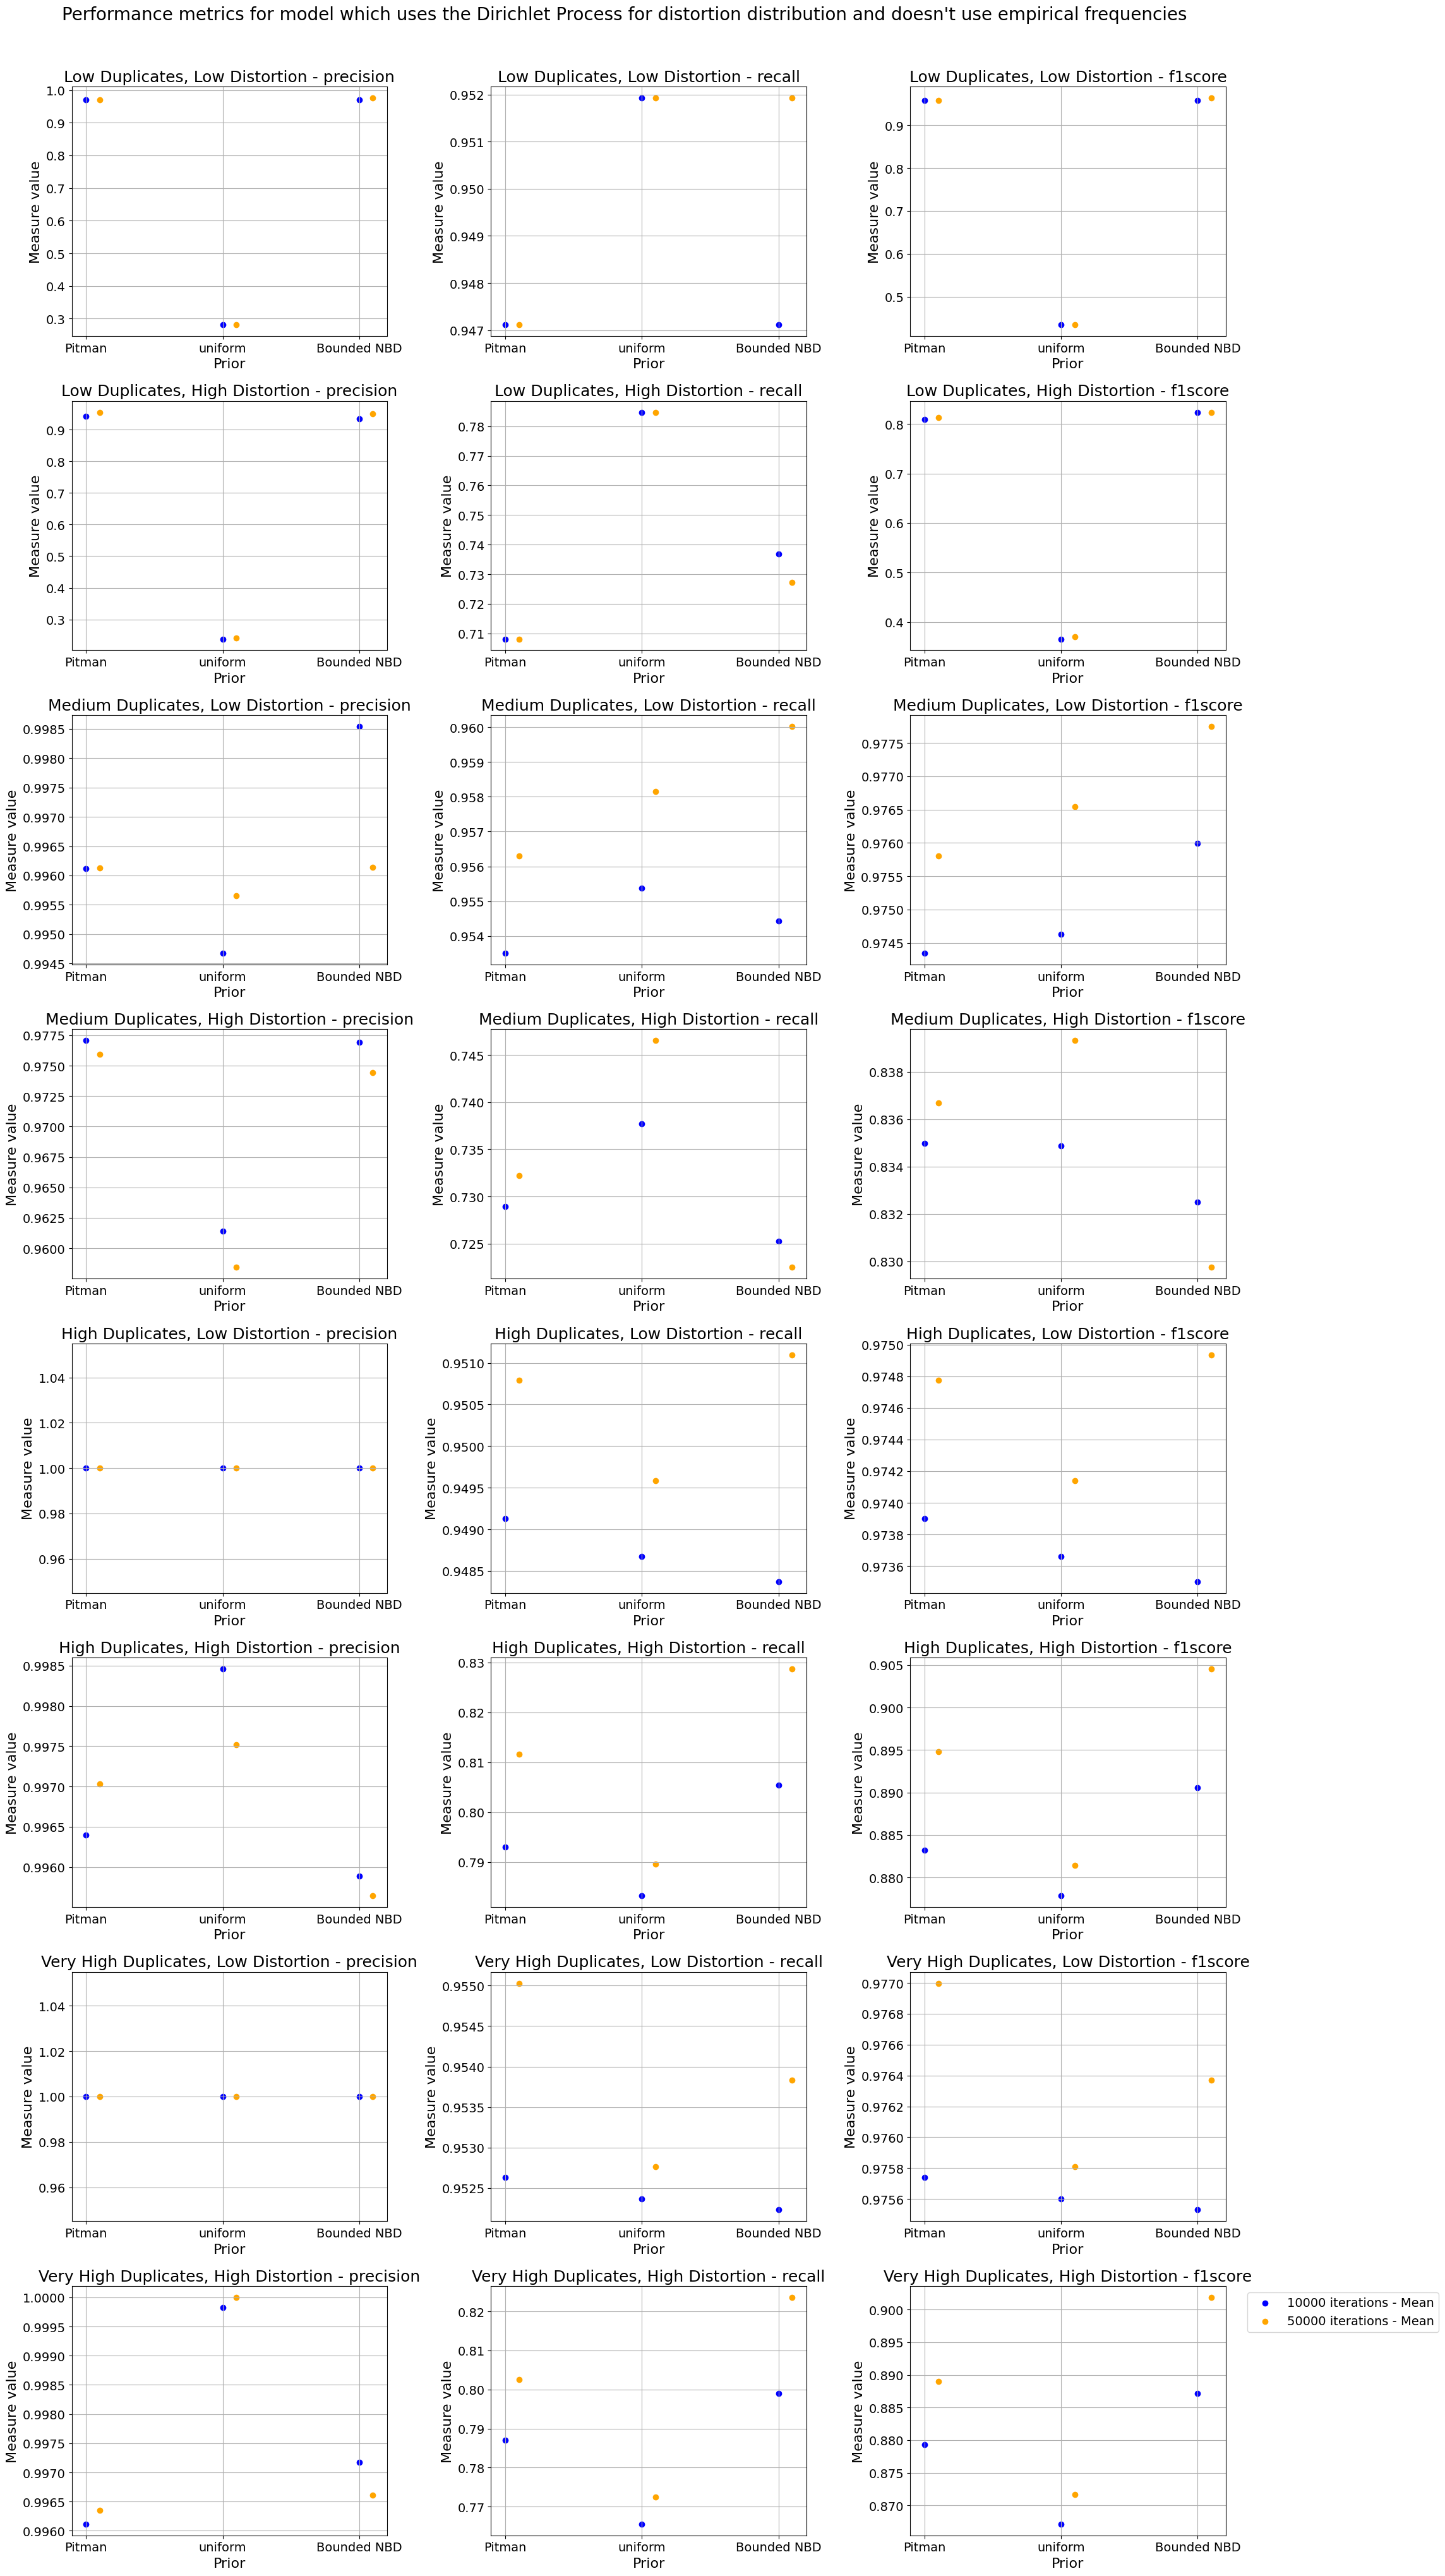

In [30]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Update default font sizes for better readability
plt.rcParams.update({'font.size': 14, 'axes.labelsize': 16, 'axes.titlesize': 18, 'xtick.labelsize': 14, 'ytick.labelsize': 14, 'legend.fontsize': 12})

# Assuming new_clean_data is your DataFrame
df = new_clean_data

# Title mapping for models
title_mapping = {
    "Both": "uses the Dirichlet Process and empirical frequencies for distortion distribution",
    "No Diri": "doesn't use the Dirichlet Process for distortion distribution but uses empirical frequencies",
    "No Empirical": "uses the Dirichlet Process for distortion distribution and doesn't use empirical frequencies",
    "None": "doesn't use the Dirichlet Process or empirical frequencies for distortion distribution"
}

for model_to_plot in new_clean_data["model"].unique():
    df_model = df[df['model'] == model_to_plot]

    # Change metrics to focus on mean values
    metrics = ['precision', 'recall', 'f1score']

    filtered_data = new_clean_data[new_clean_data['model'] == 'Both']

    duplicates_levels = filtered_data['duplicates_level'].unique()
    distortion_levels = filtered_data['distortion_level'].unique()

    colors = {10000: 'blue', 50000: 'orange'}

    # Generate plots
    plt.figure(figsize=(20, 40))

    for i, metric in enumerate(metrics):
        
        for j, dup_level in enumerate(duplicates_levels):
            for k, dist_level in enumerate(distortion_levels):
                index = (j * 2 + k) * 3 + i + 1
                plt.subplot(8, 3, index)
                
                df_plot = df_model[(df_model['duplicates_level'] == dup_level) & 
                                   (df_model['distortion_level'] == dist_level)]
                
                for num_iter in [10000, 50000]:
                    subset = df_plot[df_plot['num_iter'] == num_iter]
                    x_values = [i + (0.1 if num_iter == 50000 else 0) for i in range(len(subset['prior'].unique()))]
                    # Plot mean values as dots
                    plt.scatter(x_values, subset[metric], color=colors[num_iter], label=f'{num_iter} iterations - Mean')
                    
                plt.xticks(ticks=range(len(subset['prior'].unique())), labels=subset['prior'].unique(), fontsize=14)
                plt.yticks(fontsize=14)
                plt.title(f'{dup_level} Duplicates, {dist_level} Distortion - {metric}', fontsize=18)
                plt.xlabel('Prior', fontsize=16)
                plt.ylabel("Measure value", fontsize=16)
                plt.grid(True)
                
                # Create a ScalarFormatter object for y-axis
                y_formatter = ScalarFormatter(useOffset=False)
                y_formatter.set_scientific(False)
                
                # Set the y-axis formatter for the current subplot
                plt.gca().yaxis.set_major_formatter(y_formatter)
        

    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
    plt.suptitle(f"Performance metrics for model which {title_mapping.get(model_to_plot, 'Unknown Model')}", fontsize=20, y=1.02)

    # Save the plot
    mean_plot_path = f"plots/{model_to_plot}_mean_plot.png"
    plt.savefig(mean_plot_path, bbox_inches='tight')
